# Exploring Data Cube Products and Measurements

## Introduction

In this tutorial, we'll learn how to use the Open Data Cube to:

- List available products and their measurements.
- Extract metadata from datasets.
- Load and visualize satellite imagery data.

We'll focus on Sentinel-2 data over Trinidad and Tobago.

---

## Importing Required Libraries

First, let's import the necessary libraries:

In [1]:
import datacube
from datacube.utils import geometry
import pandas as pd
from odc.ui import DcViewer

Check the version of the Data Cube:

In [2]:
print(f"Data Cube Version: {datacube.__version__}")

Data Cube Version: 1.8.9


---

## Initializing the Data Cube

Create an instance of the Data Cube with a specific application name:

In [3]:
dc = datacube.Datacube(app="01_Products_and_Measurements_Week_1")

---

## Listing Available Products

Retrieve and display the list of available products:

In [5]:
products = dc.list_products()

Select specific columns to display for clarity:

In [6]:
display_columns = ["name", "description", "default_crs", "default_resolution"]
products[display_columns].sort_index()

,name,description,default_crs,default_resolution
name,,,,
s2_ard_scene,s2_ard_scene,Sentinel 2 L2A scenes processed using dc_prepr...,None,None


---

## Selecting a Product

We'll work with the Sentinel-2 Analysis Ready Data product:

In [7]:
product = "s2_ard_scene"

---
## Exploring Measurements

List all measurements available for the selected product:

In [8]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition
measurement,,,,,,
B01_60m,B01_60m,int16,reflectance,-9999,"[band_1, coastal_aerosol]",NaN
B02_10m,B02_10m,int16,reflectance,-9999,"[band_2, blue]",NaN
B03_10m,B03_10m,int16,reflectance,-9999,"[band_3, green]",NaN
B04_10m,B04_10m,int16,reflectance,-9999,"[band_4, red]",NaN
B05_20m,B05_20m,int16,reflectance,-9999,"[band_5, veg5]",NaN
B06_20m,B06_20m,int16,reflectance,-9999,"[band_6, veg6]",NaN
B07_20m,B07_20m,int16,reflectance,-9999,"[band_7, veg7]",NaN
B08_10m,B08_10m,int16,reflectance,-9999,"[band_8, nir]",NaN
B8A_20m,B8A_20m,int16,reflectance,-9999,"[band_8a, narrow_nir]",NaN


---
## Finding Datasets

Search for datasets within the selected product:

In [9]:
datasets = dc.find_datasets(product="s2_ard_scene")

## Extracting Metadata from Datasets

Let's examine metadata from the first five datasets:

In [10]:
for ds in datasets[:5]:
    # Extract the dataset ID
    img_id = ds.metadata_doc['id']

    # Extract the acquisition date
    acquisition_date = ds.time.begin  # Adjust if necessary for your product

    # Extract the bounding box coordinates
    bounding_box = ds.extent.boundingbox
    coordinates = {
        "min_lon": bounding_box.left,
        "min_lat": bounding_box.bottom,
        "max_lon": bounding_box.right,
        "max_lat": bounding_box.top
    }

    # Extract the Coordinate Reference System (CRS)
    crs = ds.crs

    # Display the dataset information
    print(f"ID: {img_id}")
    print(f"Acquisition Date: {acquisition_date}")
    print(f"Coordinates: {coordinates}")
    print(f"CRS: {crs}")
    print("-" * 40)

ID: 04656b38-ff18-482e-bd96-b992cde67df4
Acquisition Date: 2022-12-29 14:37:25
Coordinates: {'min_lon': 600000.0, 'min_lat': 1190220.0, 'max_lon': 709800.0, 'max_lat': 1300020.0}
CRS: PROJCS["WGS 84 / UTM zone 20N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-63],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32620"]]
----------------------------------------
ID: 4d2e443b-046c-4702-8658-442fec0994c9
Acquisition Date: 2022-12-29 14:37:25
Coordinates: {'min_lon': 699960.0, 'min_lat': 1090200.0, 'max_lon': 809760.0, 'max_lat': 1200000.

### Interpreting the Output

The output provides:

- **ID**: Unique identifier for each dataset.
- **Acquisition Date**: When the data was captured.
- **Coordinates**: The spatial extent of the dataset.
- **CRS**: The coordinate reference system used.

## Loading Data

Define the spatial and temporal parameters for data loading:

In [11]:
# Define the spatial extent (longitude and latitude)
x = (-61.31, -61.25)  # Longitude range
y = (10.6, 10.66)     # Latitude range

Load the data for the specified measurements and area:

In [14]:
ds = dc.load(
    datasets=datasets,
    measurements=["red", "green", "blue"],
    x=x,
    y=y,    
    output_crs="EPSG:32620", # WGS 84 / UTM zone 20N
    resolution=(-10, 10), # 10m resolution
)

---

## Exploring the Loaded Data

Select a specific time slice by index:

In [15]:
first_timestep = ds.red.isel(time=7)
print(first_timestep)

<xarray.DataArray 'red' (y: 668, x: 661)>
array([[4383, 4477, 4454, ..., 4063, 3838, 3681],
       [5150, 5051, 4865, ..., 4118, 3990, 3965],
       [5510, 5440, 5360, ..., 4304, 4299, 4395],
       ...,
       [4664, 4782, 4951, ..., 1932, 1798, 1834],
       [5705, 5723, 5511, ..., 2256, 2171, 2213],
       [6152, 6039, 5925, ..., 2668, 2640, 2426]], dtype=int16)
Coordinates:
    time         datetime64[ns] 2022-02-07T14:39:52.500000
  * y            (y) float64 1.179e+06 1.179e+06 ... 1.172e+06 1.172e+06
  * x            (x) float64 6.849e+05 6.849e+05 ... 6.914e+05 6.915e+05
    spatial_ref  int32 32620
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32620
    grid_mapping:  spatial_ref


---

## Visualizing the Data

Plot the selected time slice:

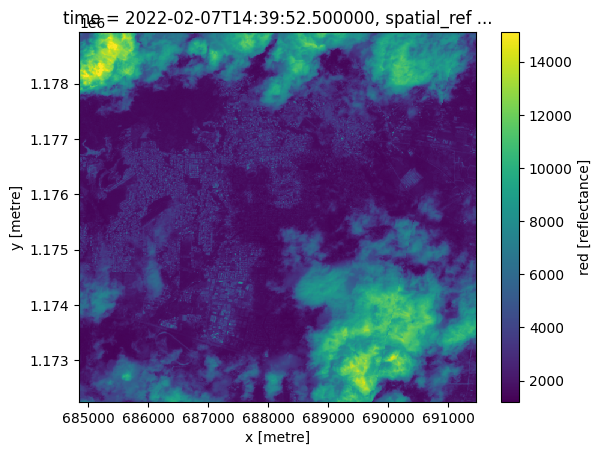

In [16]:
first_timestep.plot()